In [11]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


from tqdm import trange
#from tqdm.notebook import tqdm

def calcaverage(df):
    #xgrit=np.linspace(min(df['R']),max(df['R']),50)
    #ygrit=np.linspace(min(df['z']),max(df['z']),50)
    r_range=100
    z_range=50
    R=np.linspace(0,20,r_range)
    z=np.linspace(-5,5,z_range)
    R_grid=[]
    z_grid=[]
    age_grid=[]
    count=0
    for i in trange(r_range-1):
        for j in range(z_range-1):
            R_grid.append((R[i]+R[i+1])/2.)
            z_grid.append((z[j]+z[j+1])/2.)
            
            df_grid=df.loc[df['R']>R[i]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['R']<R[i+1]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['z']>z[j]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['z']<z[j+1]]
            #print(len(df_grid))
            
            df_grid=df_grid.dropna(subset=['Age'])
            
            age_grid.append(np.median(df_grid['Age']))
            #print(df_grid['Age'])
            
    #plt.figure(figsize=(20,8))
    #cm = plt.cm.get_cmap('viridis',5)
    #plt.scatter(R_grid,z_grid,c=age_grid,cmap=cm,vmin=0,vmax=14,s=100,alpha=1)
    #plt.xlabel('$R_{GAL}$ [kpc]')
    #plt.ylabel('Galactic hight [kpc]')
    #cb=plt.colorbar()
    #cb.set_label('Age [Gyr]')
    #plt.xlim([0,20])
    #plt.ylim([-5,5])
    #plt.title('Ages of %d stars from APOGEE using The Cannon'%len(df_CM),fontsize=25)
    #plt.title('Ages of %d stars from APOGEE using The Cannon'%len(newplot),fontsize=25)

    return R_grid,z_grid,age_grid

import matplotlib 
from matplotlib import rc
rc('text', usetex=True)
import numpy as np
from pylab import rcParams
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
from matplotlib.pyplot import axes
from matplotlib.pyplot import colorbar
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def makeagemap_each(R,z,ageval, ax,textval,flag2,vmin1,vmax1,axistext,lims,binnum):
    x1,x2,y1,y2 = lims[0], lims[1], lims[2], lims[3]
    
    R = np.array(R)
    z = np.array(z)
    ageval = np.array(ageval) 
    
    xval = R
    yval = z
    wval = ageval 
    
    x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
    
    hist1,x2,y2,temp = plt.hist2d(xval, yval, weights = wval, bins= binnum, range = ((x1m,x2m), (y1m,y2m)),cmin=2 )
    hist1_norm,x3,y3,temp = plt.hist2d(xval, yval, bins = binnum, range = ((x1m,x2m), (y1m,y2m)),cmin=2)

    image = hist1/hist1_norm  
    
    masked_array = np.ma.array (image, mask=np.isnan(image))
    
    plt.figure(figsize=(16,10))    
    cmap1 = plt.cm.get_cmap('RdYlBu_r',10)
    cmap1.set_bad('white',1.)
    
    plt.imshow(masked_array.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=vmin1,vmax=vmax1)
 
    plt.subplots_adjust(bottom=0.20)
    plt.xlabel("R$_{\mbox{GAL}}$ (kpc) ",fontsize = 20,labelpad =5)
    plt.ylabel("Galactic height, $z$ (kpc)" ,fontsize = 20)
    
    cb=plt.colorbar(orientation = 'horizontal', shrink=.75)
    fs = 20
    cb.set_label('Age [Gyr]',fontsize = fs,labelpad = 5)
    fs = 30 
    plt.xlim(x1m,x2m)
    plt.ylim(y1m,y2m)
    
    #savefig('/Users/ness/new_laptop/AAS_2016/agemap.png', fmt = "png",bbox = 'Tight', transparent = True)

    return masked_array



In [12]:
df_CM=pd.read_pickle('CannonDR16.pkl')


245497


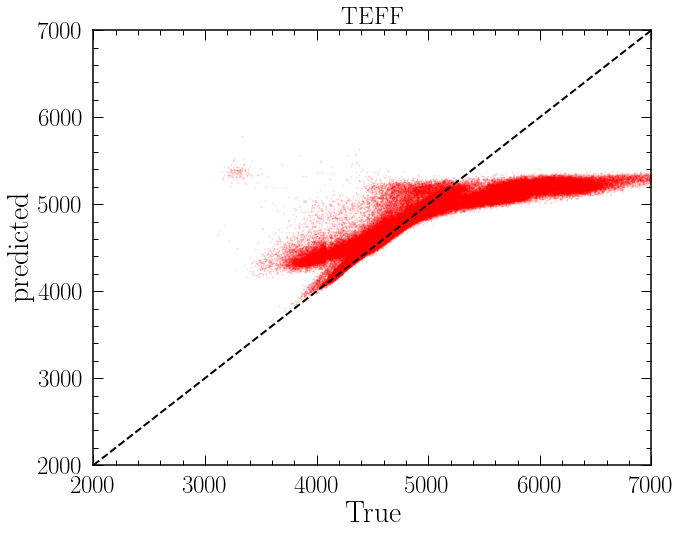

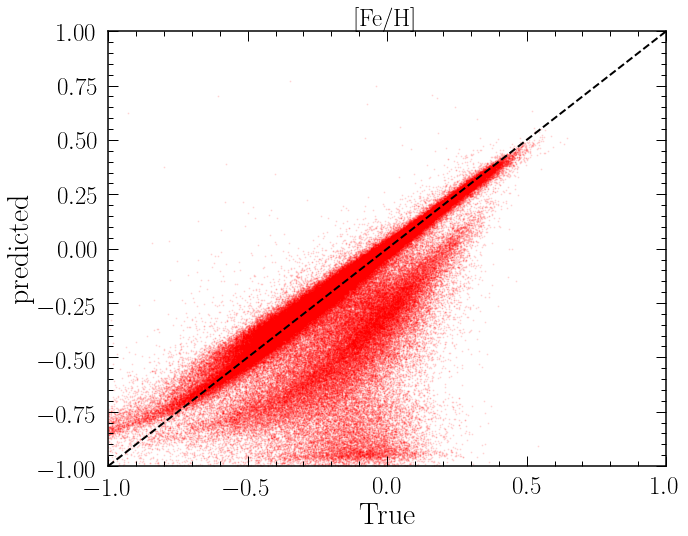

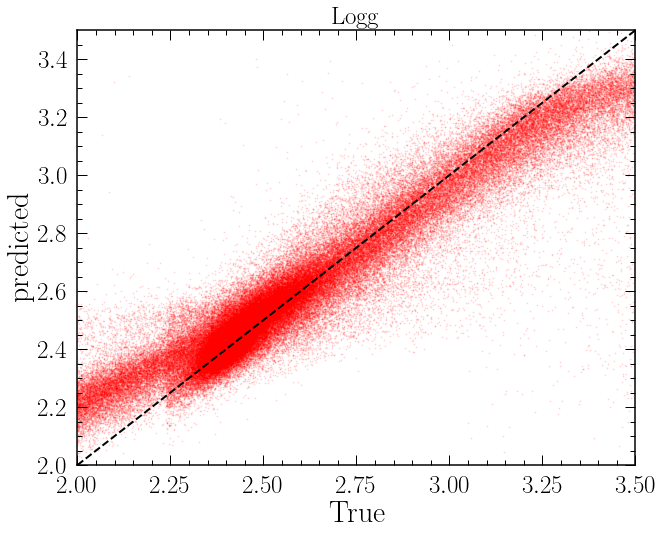

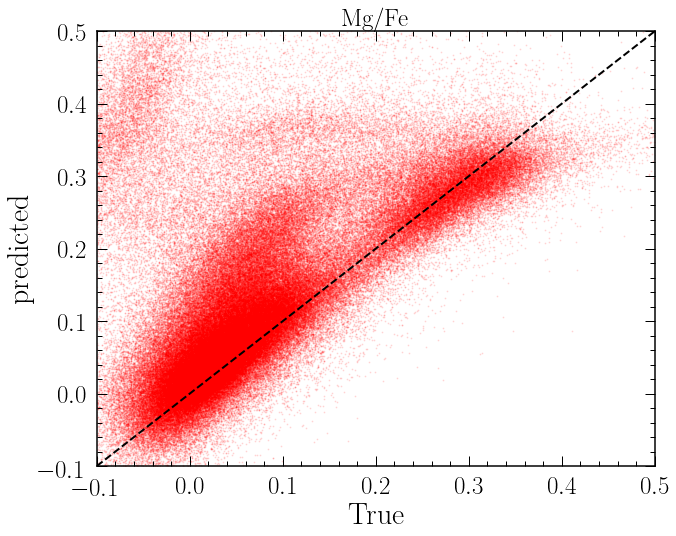

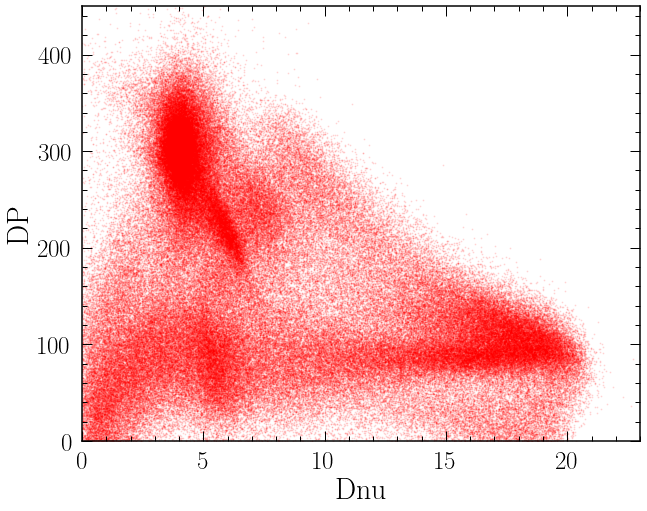

In [13]:
# without cutting
plt.figure(figsize=(10,8))
plt.scatter(df_CM['TEFF'],df_CM['T_{eff}'],s=1,alpha=0.1,c='r')
plt.plot([2000,7000],[2000,7000],'k--')
plt.xlim([2000,7000])
plt.ylim([2000,7000])
plt.title('TEFF',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
plt.scatter(df_CM['M_H'],df_CM['[Fe/H]'],s=1,alpha=0.1,c='r')
plt.plot([-1,1],[-1,1],'k--')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('[Fe/H]',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
plt.scatter(df_CM['LOGG'],df_CM['Log(g)'],s=1,alpha=0.1,c='r')
plt.plot([2,3.5],[2,3.5],'k--')
plt.xlim([2,3.5])
plt.ylim([2,3.5])
plt.title('Logg',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
#plt.scatter(df_CM['MG_FE'],df_CM['[Mg/Fe]'],s=1,alpha=0.1,c=df_CM['TEFF'])
plt.scatter(df_CM['MG_FE'],df_CM['[Mg/Fe]'],s=1,alpha=0.1,c='r')
plt.plot([-0.1,0.5],[-0.1,0.5],'k--')
plt.xlim([-0.1,0.5])
plt.ylim([-0.1,0.5])
plt.title('Mg/Fe',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
plt.scatter(df_CM['Dnu'],df_CM['DP'],c='r',alpha=0.1,s=1)
plt.ylim([0,450])
plt.xlim([0,23])
plt.xlabel('Dnu')
plt.ylabel('DP')
print(len(df_CM))

162064


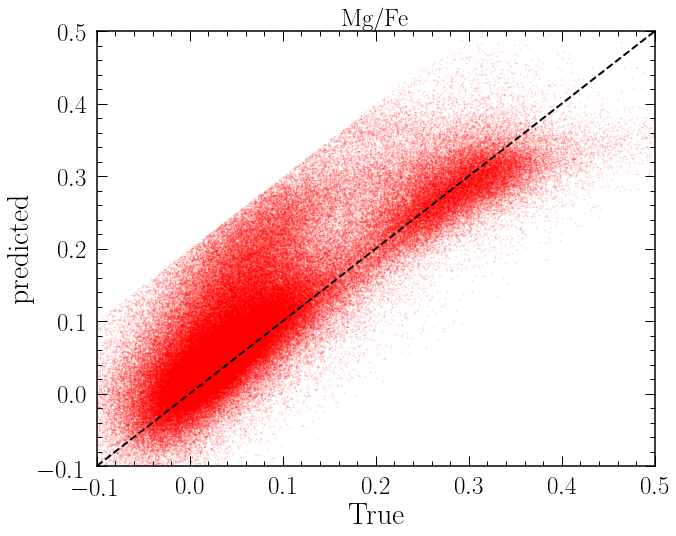

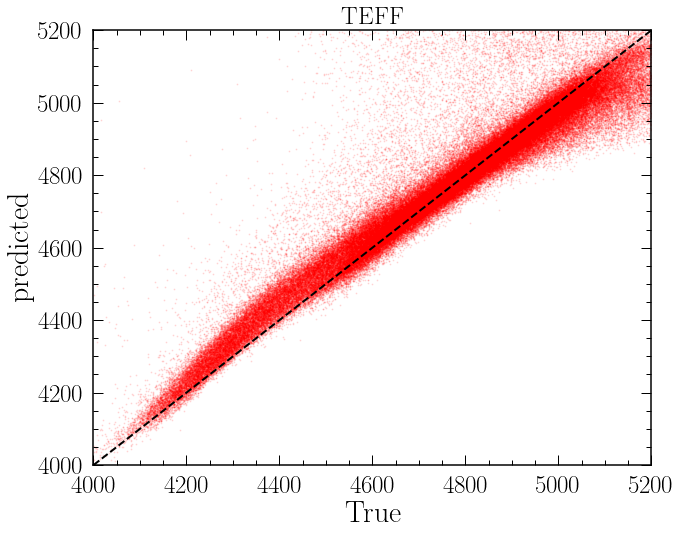

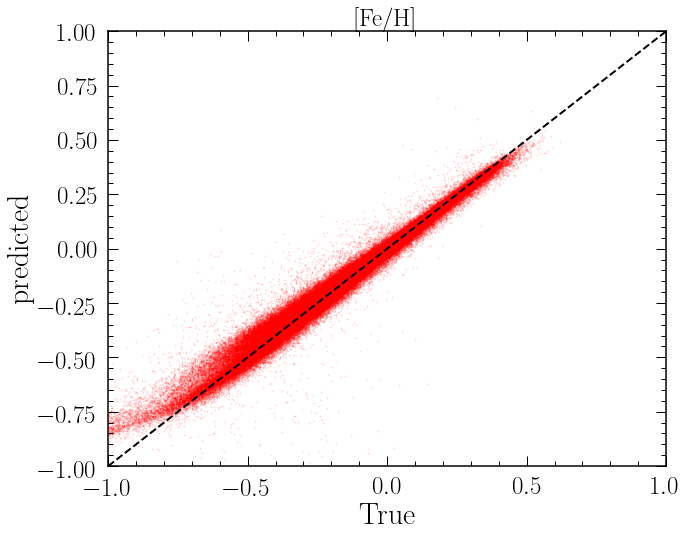

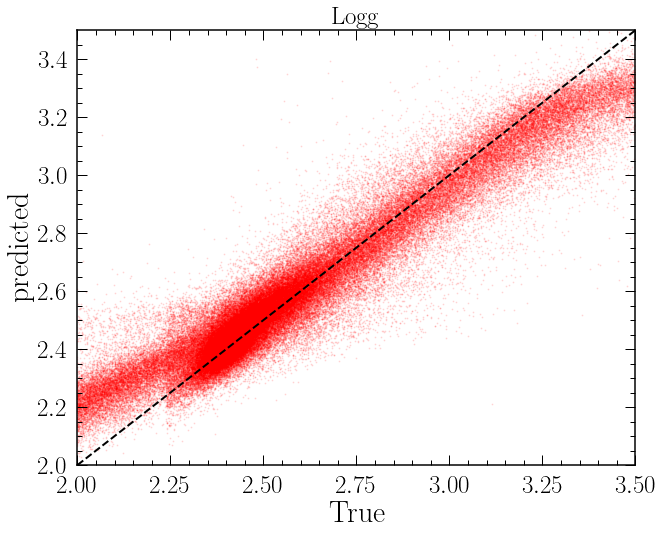

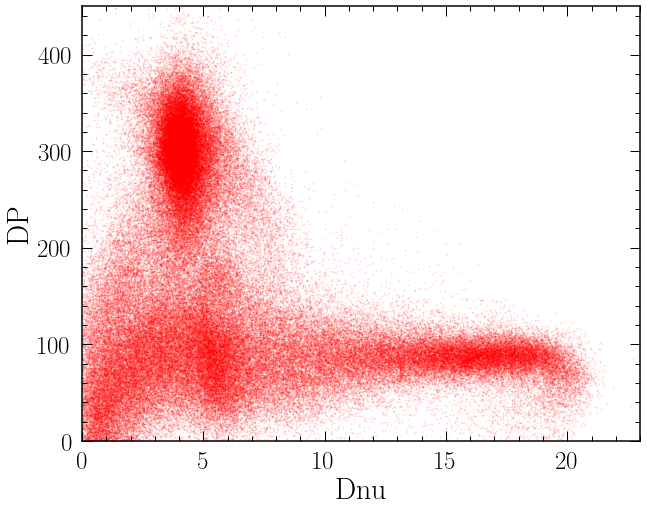

In [14]:
# After cutting
df_CM=df_CM.loc[abs(df_CM['[Mg/Fe]']-df_CM['MG_FE'])<0.2]
plt.figure(figsize=(10,8))
plt.scatter(df_CM['MG_FE'],df_CM['[Mg/Fe]'],s=1,alpha=0.1,c='r')
plt.plot([-0.1,0.5],[-0.1,0.5],'k--')
plt.xlim([-0.1,0.5])
plt.ylim([-0.1,0.5])
plt.title('Mg/Fe',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

df_CM=df_CM.loc[df_CM['TEFF']<5200]

plt.figure(figsize=(10,8))
plt.scatter(df_CM['TEFF'],df_CM['T_{eff}'],s=1,alpha=0.1,c='r')
plt.plot([4000,5200],[4000,5200],'k--')
plt.xlim([4000,5200])
plt.ylim([4000,5200])
plt.title('TEFF',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
plt.scatter(df_CM['M_H'],df_CM['[Fe/H]'],s=1,alpha=0.1,c='r')
plt.plot([-1,1],[-1,1],'k--')
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('[Fe/H]',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
plt.scatter(df_CM['LOGG'],df_CM['Log(g)'],s=1,alpha=0.1,c='r')
plt.plot([2,3.5],[2,3.5],'k--')
plt.xlim([2,3.5])
plt.ylim([2,3.5])
plt.title('Logg',fontsize=25)
plt.xlabel('True')
plt.ylabel('predicted')

plt.figure(figsize=(10,8))
plt.scatter(df_CM['Dnu'],df_CM['DP'],c='r',alpha=0.1,s=1)
plt.ylim([0,450])
plt.xlim([0,23])
plt.xlabel('Dnu')
plt.ylabel('DP')
print(len(df_CM))

In [ ]:
#rcParams['figure.figsize'] = 16.0, 8.0
#fig, (ax1) = plt.subplots(ncols=1,sharey=True) 
text1 = 'test'
axistext = 'test2'
flag2 = 1
x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

test  = df_CM.loc[df_CM['chisq']  < 20000].dropna(subset=['Age']).reset_index(drop=True)


test1 = test['Age'] < 0
test2 = test['Age'] > 12
test[test1]['Age'] = 0
test[test2]['Age'] = 12


print(len(test))

image=makeagemap_each(test['R'].values,test['z'].values,
                test['Age'].values, ax1, text1,flag2,0,13,axistext,
                lims, binnum)





In [ ]:
R_grid,z_grid,age_grid=calcaverage(df_CM)


In [ ]:
list(df_CM.columns)

In [6]:
plt.figure(figsize=(20,8))
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(R_grid,z_grid,c=age_grid,cmap=cm,vmin=0,vmax=14,s=100,alpha=1)
plt.xlabel('$R_{GAL}$ [kpc]')
plt.ylabel('Galactic hight [kpc]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlim([0,20])
plt.ylim([-5,5])
#plt.title('Ages of %d stars from APOGEE using The Cannon'%len(df_CM),fontsize=25)
plt.title('Ages of %d stars from APOGEE using The Cannon'%len(df_CM),fontsize=25)

NameError: name 'R_grid' is not defined

<Figure size 1440x576 with 0 Axes>

In [7]:
# get red clump stars
df_rc=df_CM.loc[df_CM['Dnu']>3]
df_rc=df_rc.loc[df_rc['Dnu']<5.5]
df_rc=df_rc.loc[df_rc['DP']>230]
df_rc=df_rc.loc[df_rc['DP']<370]

df_giant=df_CM.loc[df_CM['Dnu']>0]
df_giant=df_giant.loc[df_giant['Dnu']<25]
df_giant=df_giant.loc[df_giant['DP']>0]
df_giant=df_giant.loc[df_giant['DP']<150]

162064 40740


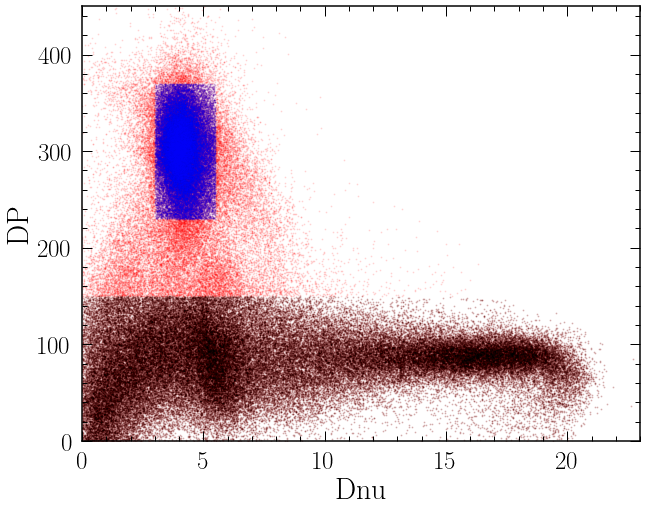

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(df_CM['Dnu'],df_CM['DP'],c='r',alpha=0.1,s=1,label='All')
plt.scatter(df_rc['Dnu'],df_rc['DP'],c='b',alpha=0.1,s=1,label='Red Clumps')
plt.scatter(df_giant['Dnu'],df_giant['DP'],c='k',alpha=0.1,s=1,label='RGB')
plt.ylim([0,450])
plt.xlim([0,23])
plt.xlabel('Dnu')
plt.ylabel('DP')
print(len(df_CM),len(df_rc))


In [ ]:
R_grid,z_grid,age_grid=calcaverage(df_rc)



  0%|          | 0/99 [00:00<?, ?it/s]/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/lucy/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 11%|█         | 11/99 [00:27<03:39,  2.49s/it]

In [ ]:
plt.figure(figsize=(20,8))
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(R_grid,z_grid,c=age_grid,cmap=cm,vmin=0,vmax=14,s=100,alpha=1)
plt.xlabel('$R_{GAL}$ [kpc]')
plt.ylabel('Galactic hight [kpc]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')
plt.xlim([0,20])
plt.ylim([-5,5])
#plt.title('Ages of %d stars from APOGEE using The Cannon'%len(df_CM),fontsize=25)
plt.title('Ages of %d red clump stars from APOGEE using The Cannon'%len(df_rc),fontsize=25)


/Users/lucy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


39461


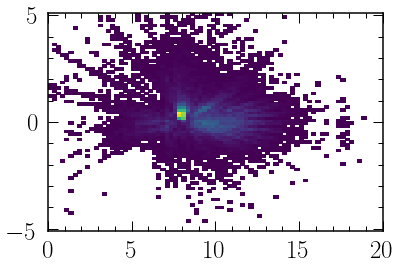

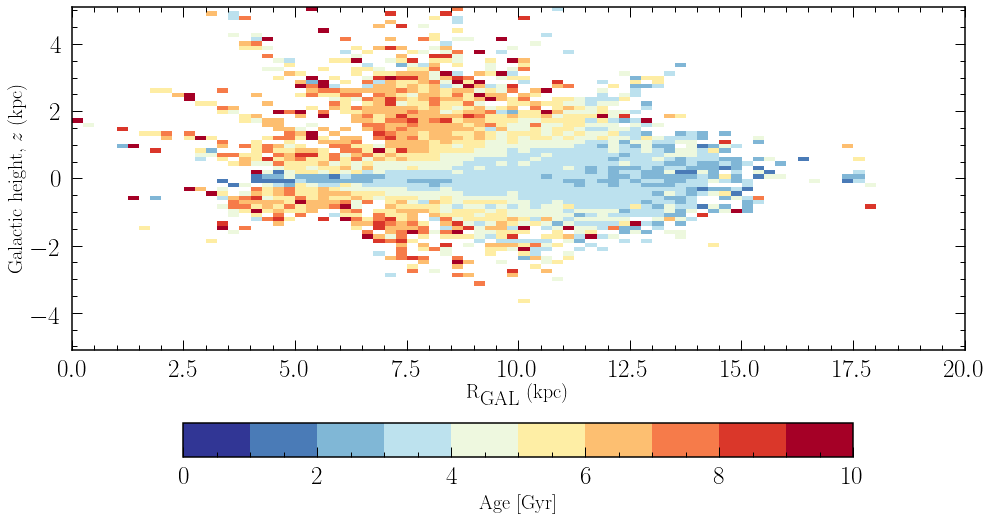

In [10]:
#rcParams['figure.figsize'] = 16.0, 8.0
#fig, (ax1) = plt.subplots(ncols=1,sharey=True) 
text1 = 'test'
axistext = 'test2'
flag2 = 1
x1,x2,y1,y2 = 0,20,-5.1,5.1
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80

test  = df_rc.loc[df_rc['chisq']  < 20000].dropna(subset=['Age']).reset_index(drop=True)


test1 = test['Age'] < 0
test2 = test['Age'] > 12
test[test1]['Age'] = 0
test[test2]['Age'] = 12


print(len(test))

image=makeagemap_each(test['R'].values,test['z'].values,
                test['Age'].values, [], text1,flag2,0,10,axistext,
                lims, binnum)





# Analysis on these red clump stars

In [46]:
list(df_rc.columns)

['ID',
 '[Fe/H]',
 'T_{eff}',
 'Log(g)',
 '[Mg/Fe]',
 'DP',
 'Dnu',
 'LogAge',
 '[Fe/H]_err',
 'T_{eff}_err',
 'Log(g)_err',
 '[Mg/Fe]_err',
 'DP_err',
 'Dnu_err',
 'LogAge_err',
 'chisq',
 'APSTAR_ID',
 'TARGET_ID',
 'ASPCAP_ID',
 'FILE',
 'APOGEE_ID',
 'TELESCOPE',
 'LOCATION_ID',
 'FIELD',
 'J',
 'J_ERR',
 'H',
 'H_ERR',
 'K',
 'K_ERR',
 'RA',
 'DEC',
 'GLON',
 'GLAT',
 'APOGEE_TARGET1',
 'APOGEE_TARGET2',
 'APOGEE_TARGET3',
 'APOGEE2_TARGET1',
 'APOGEE2_TARGET2',
 'APOGEE2_TARGET3',
 'TARGFLAGS',
 'SURVEY',
 'PROGRAMNAME',
 'NVISITS',
 'COMBTYPE',
 'COMMISS',
 'SNR',
 'STARFLAG',
 'STARFLAGS',
 'ANDFLAG',
 'ANDFLAGS',
 'VHELIO_AVG',
 'VSCATTER',
 'VERR',
 'VERR_MED',
 'OBSVHELIO_AVG',
 'OBSVSCATTER',
 'OBSVERR',
 'OBSVERR_MED',
 'SYNTHVHELIO_AVG',
 'SYNTHVSCATTER',
 'SYNTHVERR',
 'SYNTHVERR_MED',
 'RV_TEFF',
 'RV_LOGG',
 'RV_FEH',
 'RV_ALPHA',
 'RV_CARB',
 'RV_CCFWHM',
 'RV_AUTOFWHM',
 'SYNTHSCATTER',
 'MEANFIB',
 'SIGFIB',
 'SNREV',
 'APSTAR_VERSION',
 'ASPCAP_VERSION',
 'RESULTS_

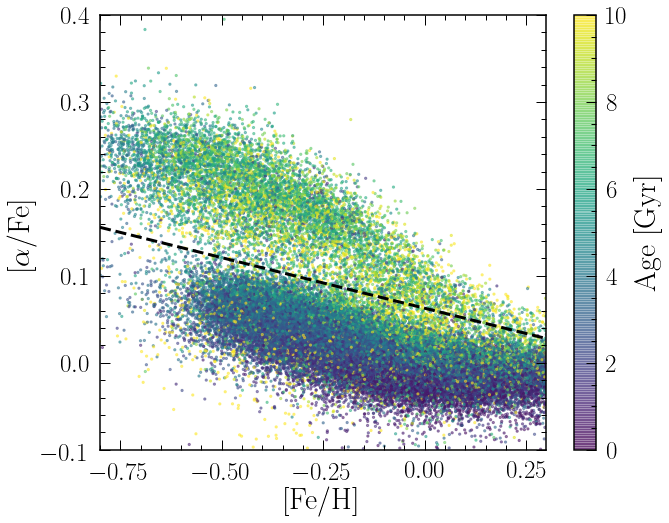

In [322]:
def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p

p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df_rc['M_H'],df_rc['ALPHA_M'],c=df_rc['Age'],vmin=0,vmax=10,alpha=0.5,s=5)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


Text(0, 0.5, '[$\\alpha$/Fe]')

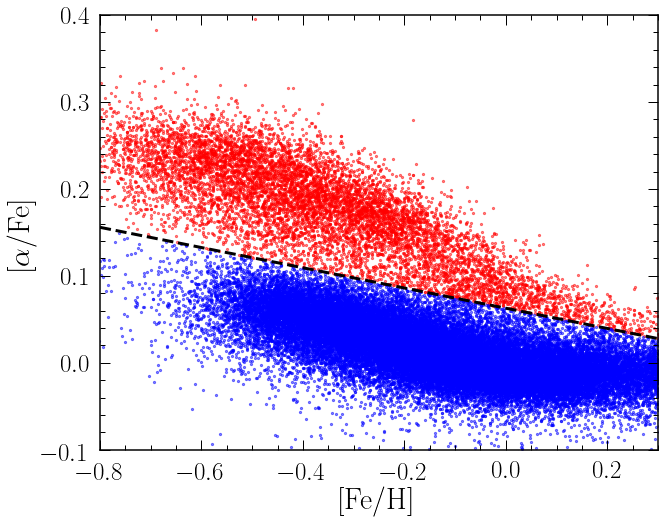

In [323]:
high_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])>=0]
low_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])<0]


plt.figure(figsize=(10,8))
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',alpha=0.5,s=5)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',alpha=0.5,s=5)
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')



In [324]:
df_cm_ha=high_alpha.loc[high_alpha['Age']<20]
df_cm_la=low_alpha.loc[low_alpha['Age']<20]

df_cm_ha=df_cm_ha.loc[df_cm_ha['Age_err']<3]
df_cm_la=df_cm_la.loc[df_cm_la['Age_err']<3]



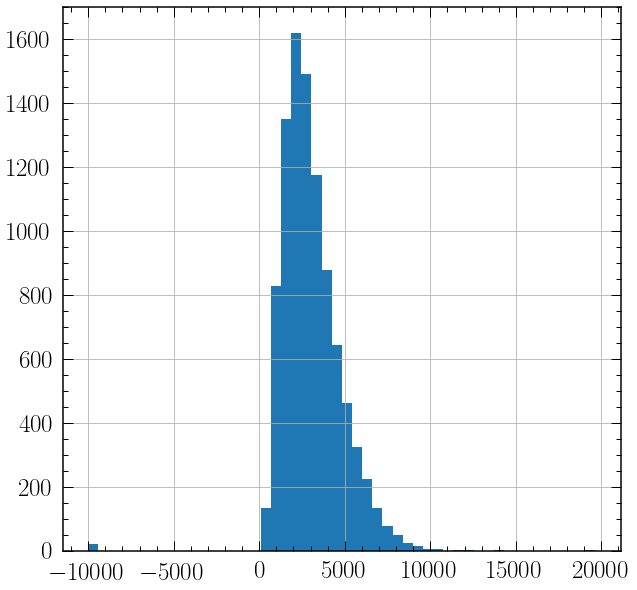

In [340]:
df_cm_ha['GAIA_R_EST'].hist(bins=50)


In [352]:
#df_abun_ha = df_abun_ha.loc[:,~df_abun_ha.columns.duplicated()]
#df_abun_ha['M_H']

In [353]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']

abun_apog_err=[i+'_ERR' for i in abun_apog]

abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
      'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','M_H':'[Fe/'}


df_abun_ha=df_cm_ha[np.append(abun_apog,np.append(abun_apog_err,['Age','Age_err','ID','TEFF','ALPHA_M','GAIA_R_EST']))].dropna()
df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['M_H']<0.05)]
#df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['GAIA_R_EST']-2000)<1000]

df_abun_la=df_cm_la[np.append(abun_apog,np.append(abun_apog_err,['Age','Age_err','ID','TEFF','ALPHA_M','GAIA_R_EST']))].dropna()
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['M_H']<0.05)]
#df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['GAIA_R_EST']-2000)<1000]

df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['TEFF']-medtemp)<rangeTeff]
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['TEFF']-medtemp)<rangeTeff]
print(len(df_abun_st_ha),len(df_abun_st_la))

1108 3718


9468
4841.02685546875


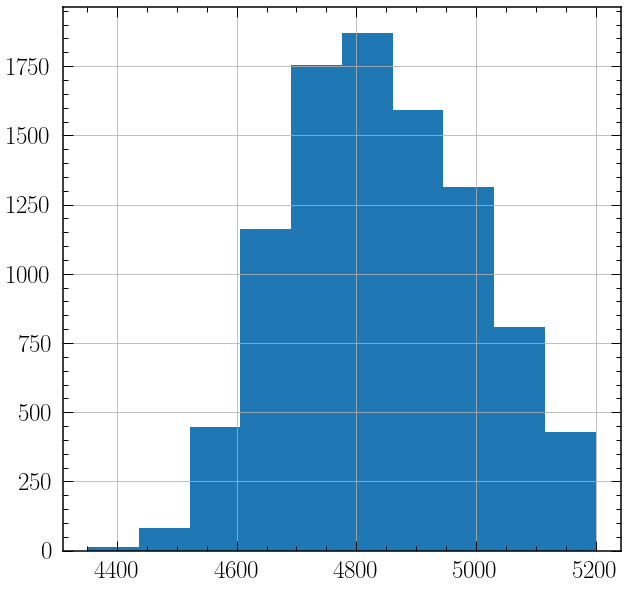

In [357]:
print(len(df_abun_ha))
print(np.mean(df_abun_ha['TEFF']))
df_abun_ha['TEFF'].hist()

medtemp=4624
rangeTeff=25

df_abun_st_ha=df_abun_ha.loc[abs(df_abun_ha['TEFF']-medtemp)<rangeTeff]
df_abun_st_la=df_abun_la.loc[abs(df_abun_la['TEFF']-medtemp)<rangeTeff]


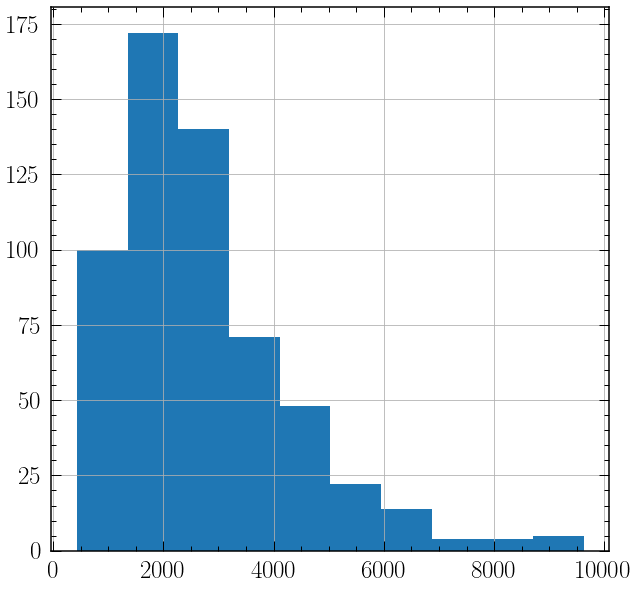

In [358]:
df_abun_st_ha['GAIA_R_EST'].hist()

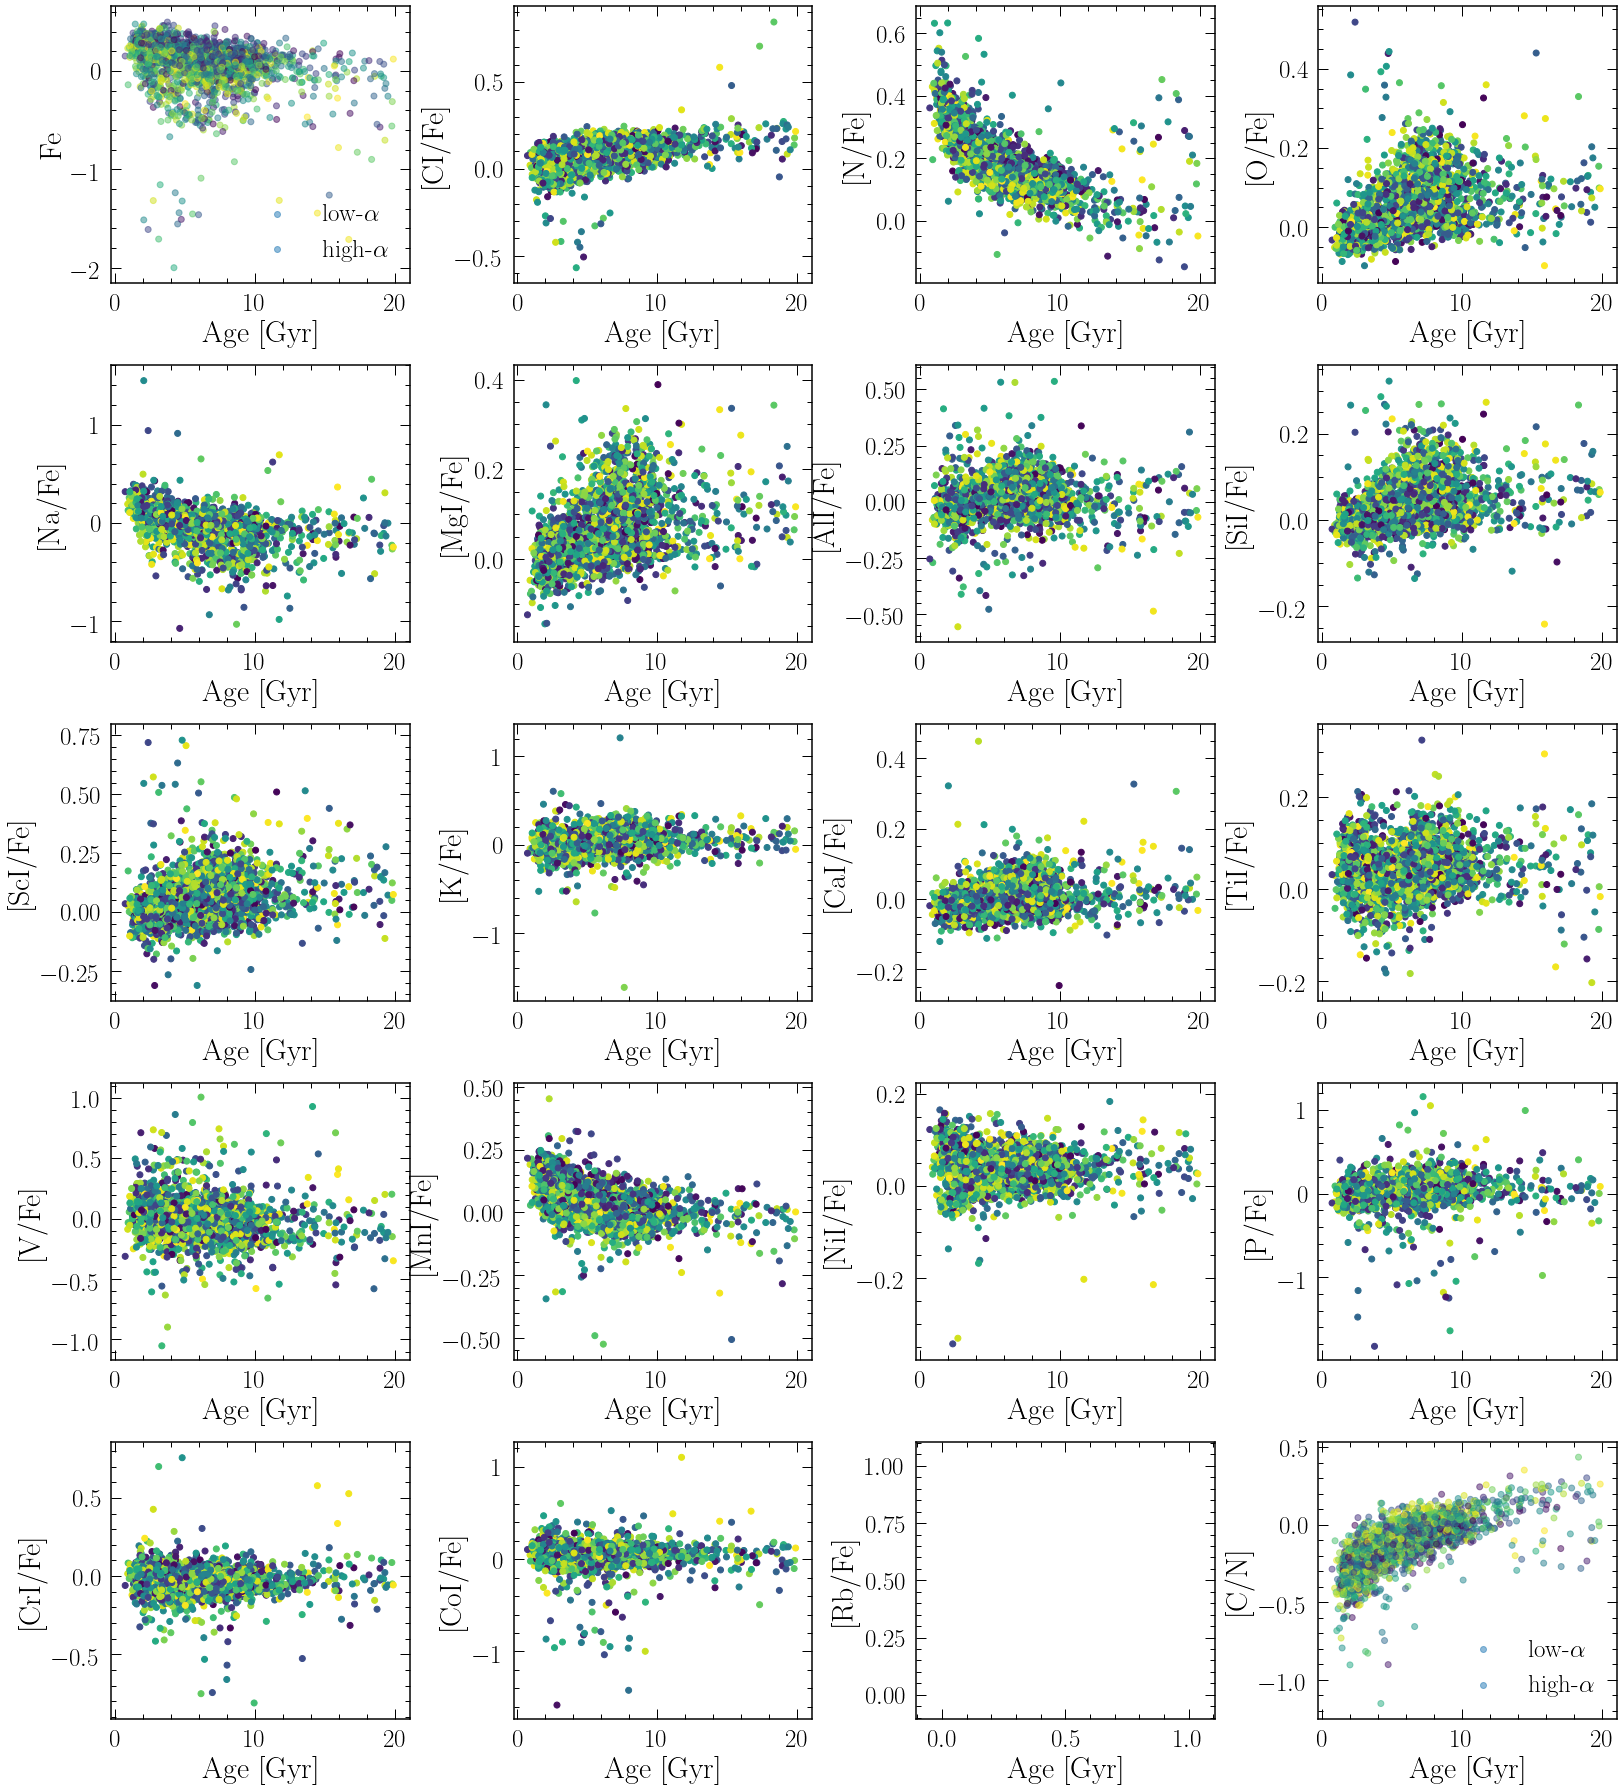

In [359]:
#medtemp=np.mean(df_abun_ha['TEFF'])

plt.figure(figsize=(22.5,25))
cm = plt.cm.get_cmap('viridis',5)
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    plt.subplot(5,4,i+1)
    plt.scatter(df_plot_la['Age'],df_plot_la[abun_apog[i]],c=df_plot_la['TEFF'],vmin=medtemp-rangeTeff,vmax=medtemp+rangeTeff)
    plt.scatter(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],c=df_plot_ha['TEFF'],vmin=medtemp-rangeTeff,vmax=medtemp+rangeTeff)
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,1)
plt.scatter(df_plot_la['Age'],df_plot_la['M_H'],c=df_plot_la['TEFF'],vmin=medtemp-rangeTeff,vmax=medtemp+rangeTeff,
            alpha=0.5,label='low-$\\alpha$')
plt.scatter(df_plot_ha['Age'],df_plot_ha['M_H'],c=df_plot_ha['TEFF'],vmin=medtemp-rangeTeff,vmax=medtemp+rangeTeff,
            alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,20)
plt.scatter(df_plot_la['Age'],df_plot_la['C_FE']-df_plot_la['N_FE'],
             c=df_plot_la['TEFF'],alpha=0.5,vmin=medtemp-rangeTeff,vmax=medtemp+rangeTeff,label='low-$\\alpha$')
plt.scatter(df_plot_ha['Age'],df_plot_ha['C_FE']-df_plot_ha['N_FE'],
             c=df_plot_ha['TEFF'],alpha=0.5,vmin=medtemp-rangeTeff,vmax=medtemp+rangeTeff,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.legend()


plt.tight_layout()

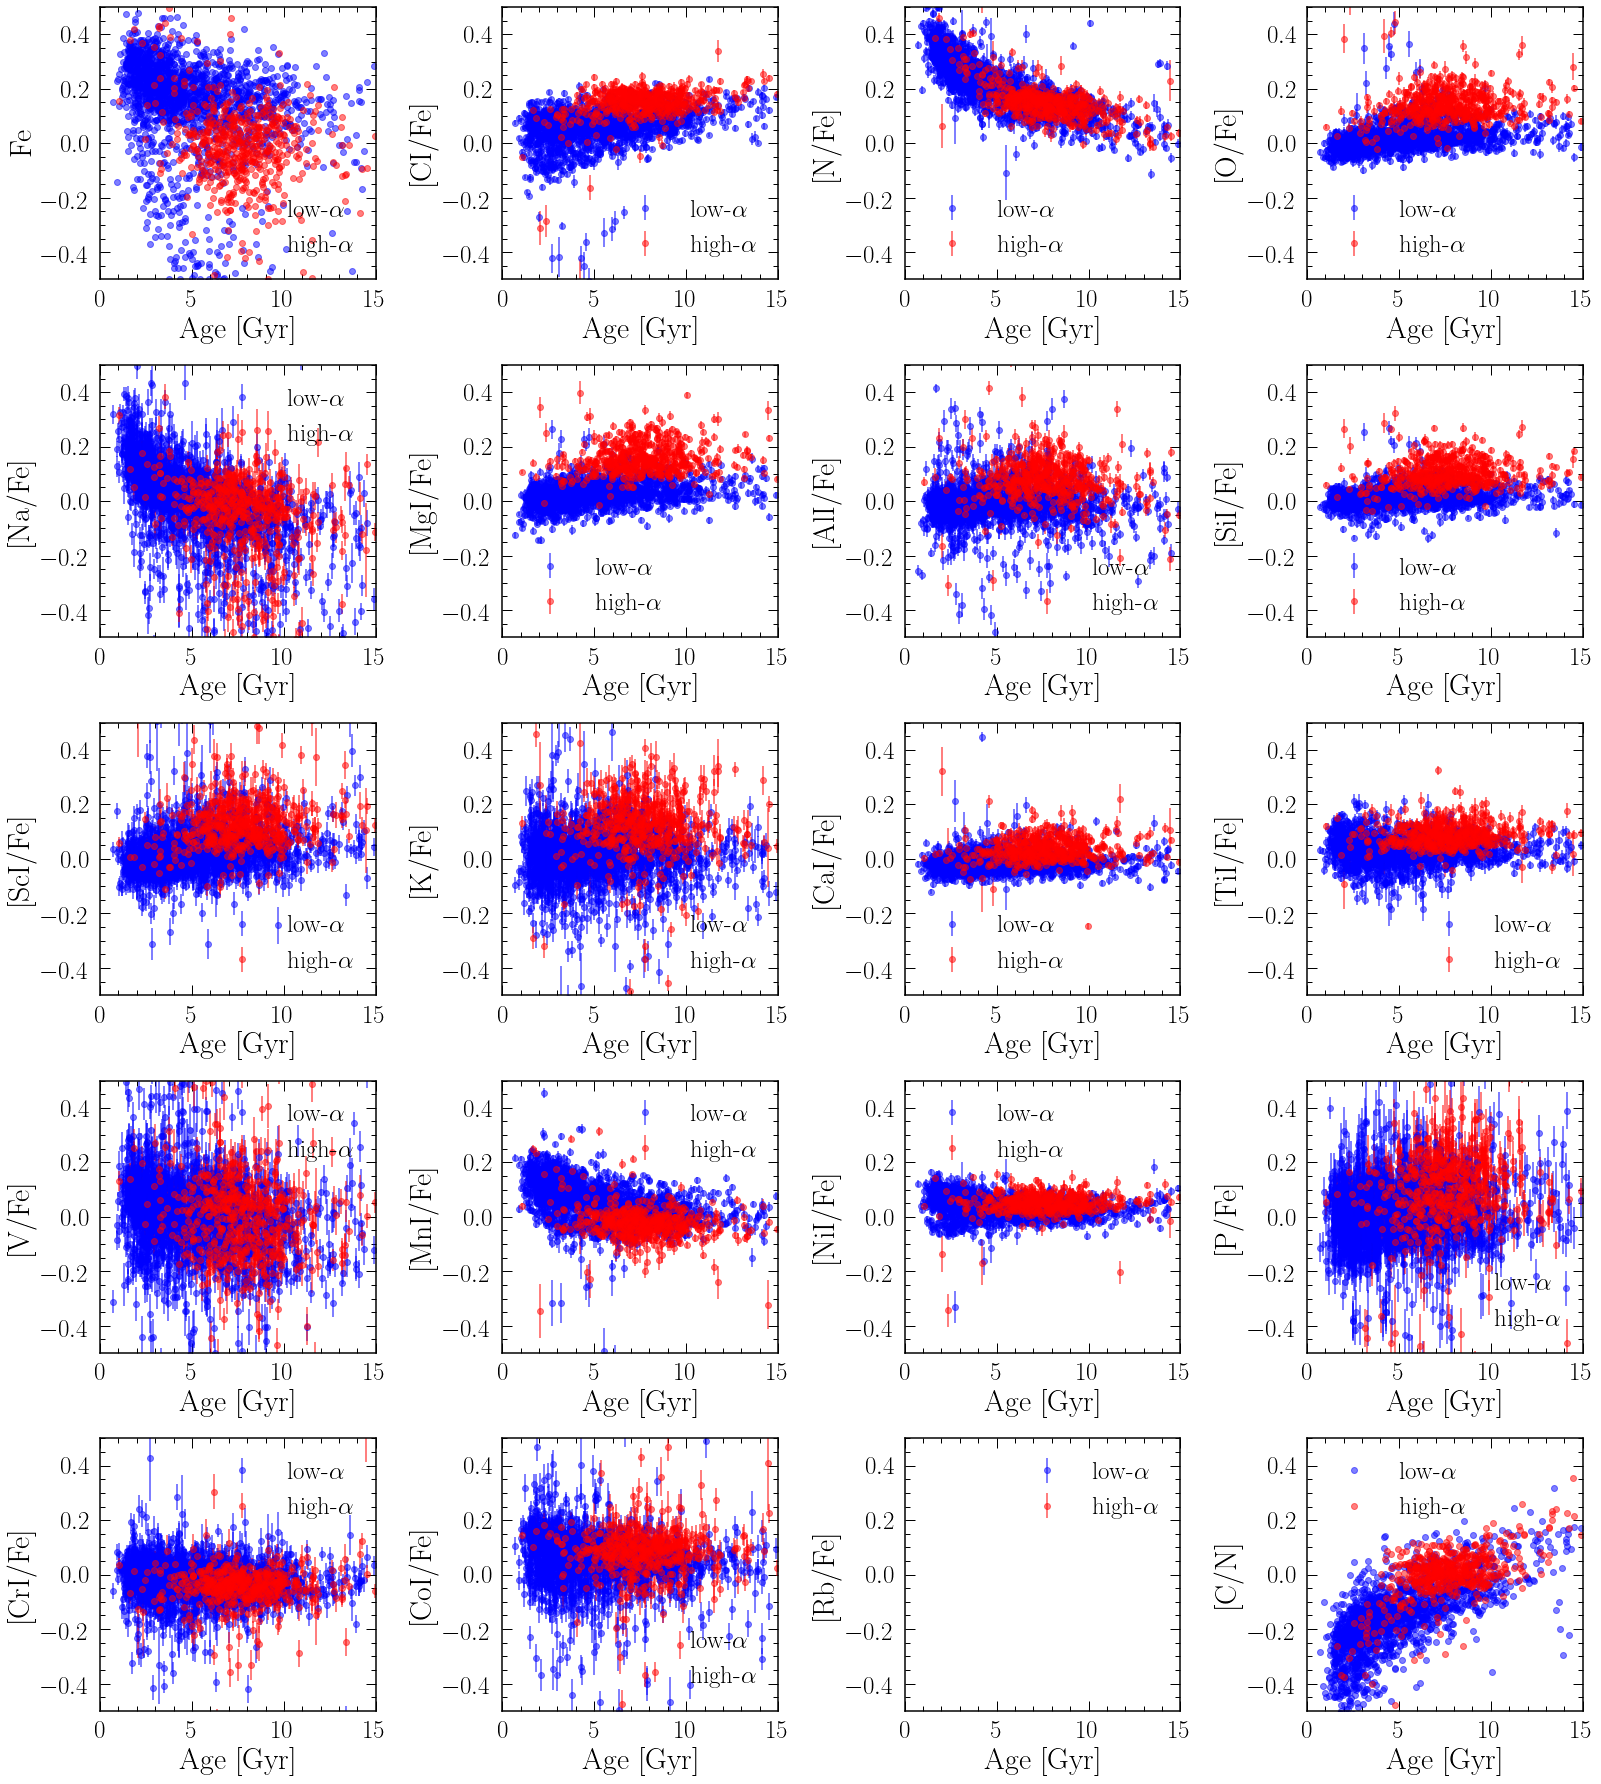

In [367]:
lim=[-0.5,0.5]
limx=[0,15]
plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],yerr=df_plot_la[abun_apog[i]+'_ERR'],fmt='bo',alpha=0.5,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],yerr=df_plot_ha[abun_apog[i]+'_ERR'],fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.ylim(lim)
    plt.xlim(limx)
    plt.legend()
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='bo',alpha=0.5,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.legend()
plt.ylim(lim)
plt.xlim(limx)
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_FE']-df_plot_la['N_FE'],
             fmt='bo',alpha=0.5,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_FE']-df_plot_ha['N_FE'],
             fmt='ro',alpha=0.5,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.legend()
plt.ylim(lim)
plt.xlim(limx)


plt.tight_layout()

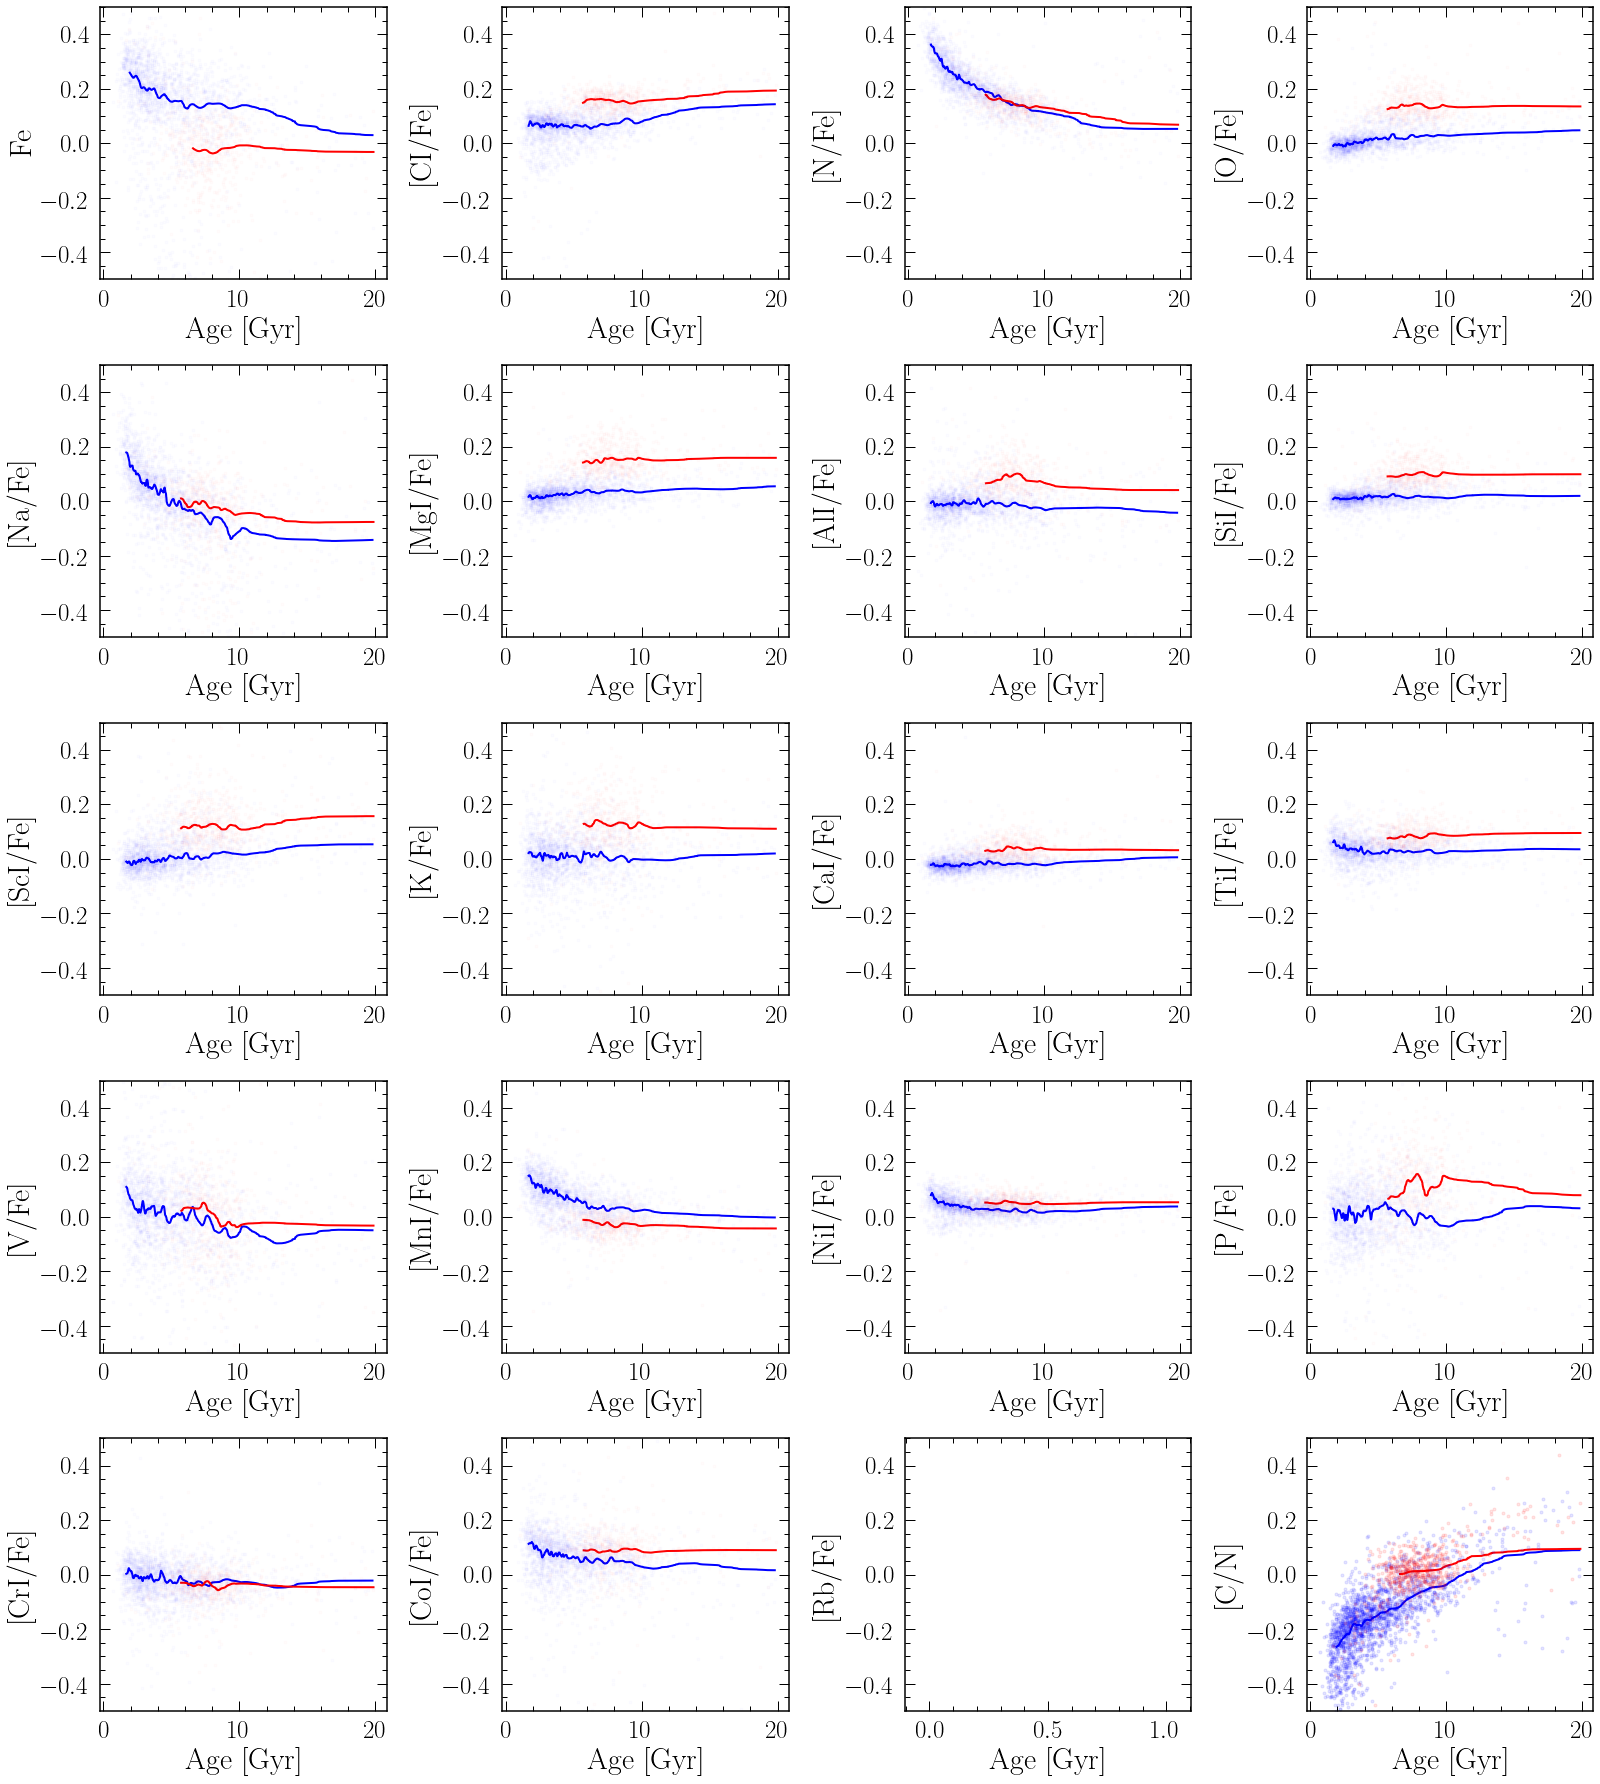

In [364]:
## running median
rn=50
lim=[-0.5,0.5]


from scipy.ndimage import gaussian_filter


plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    larm=gaussian_filter(df_plot_la[abun_apog[i]].rolling(rn).median(), sigma=10)
    harm=gaussian_filter(df_plot_ha[abun_apog[i]].rolling(rn).median(), sigma=10)
    
    plt.subplot(5,4,i+1)
    plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='b.',alpha=0.01,label='low-$\\alpha$')
    plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='r.',alpha=0.01,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:    
        laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
        haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
        
        plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
        plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.ylim(lim)
    #plt.legend()
    
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
larm=gaussian_filter(df_plot_la['M_H'].rolling(rn).median(),sigma=30)
harm=gaussian_filter(df_plot_ha['M_H'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,1)
plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='b.',alpha=0.01,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='r.',alpha=0.01,label='high-$\\alpha$')

laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.ylim(lim)
#plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
df_plot_la=df_plot_la.reset_index(drop=True)

df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])    
    
larm=gaussian_filter(df_plot_la['C_N'].rolling(rn).median(),sigma=30)
harm=gaussian_filter(df_plot_ha['C_N'].rolling(rn).median(),sigma=30)
    
plt.subplot(5,4,20)
plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],fmt='b.',alpha=0.1,label='low-$\\alpha$')
plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],fmt='r.',alpha=0.1,label='high-$\\alpha$')
    
laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.ylim(lim)
#plt.legend()

plt.tight_layout()

plt.savefig('abund_cannon.png')

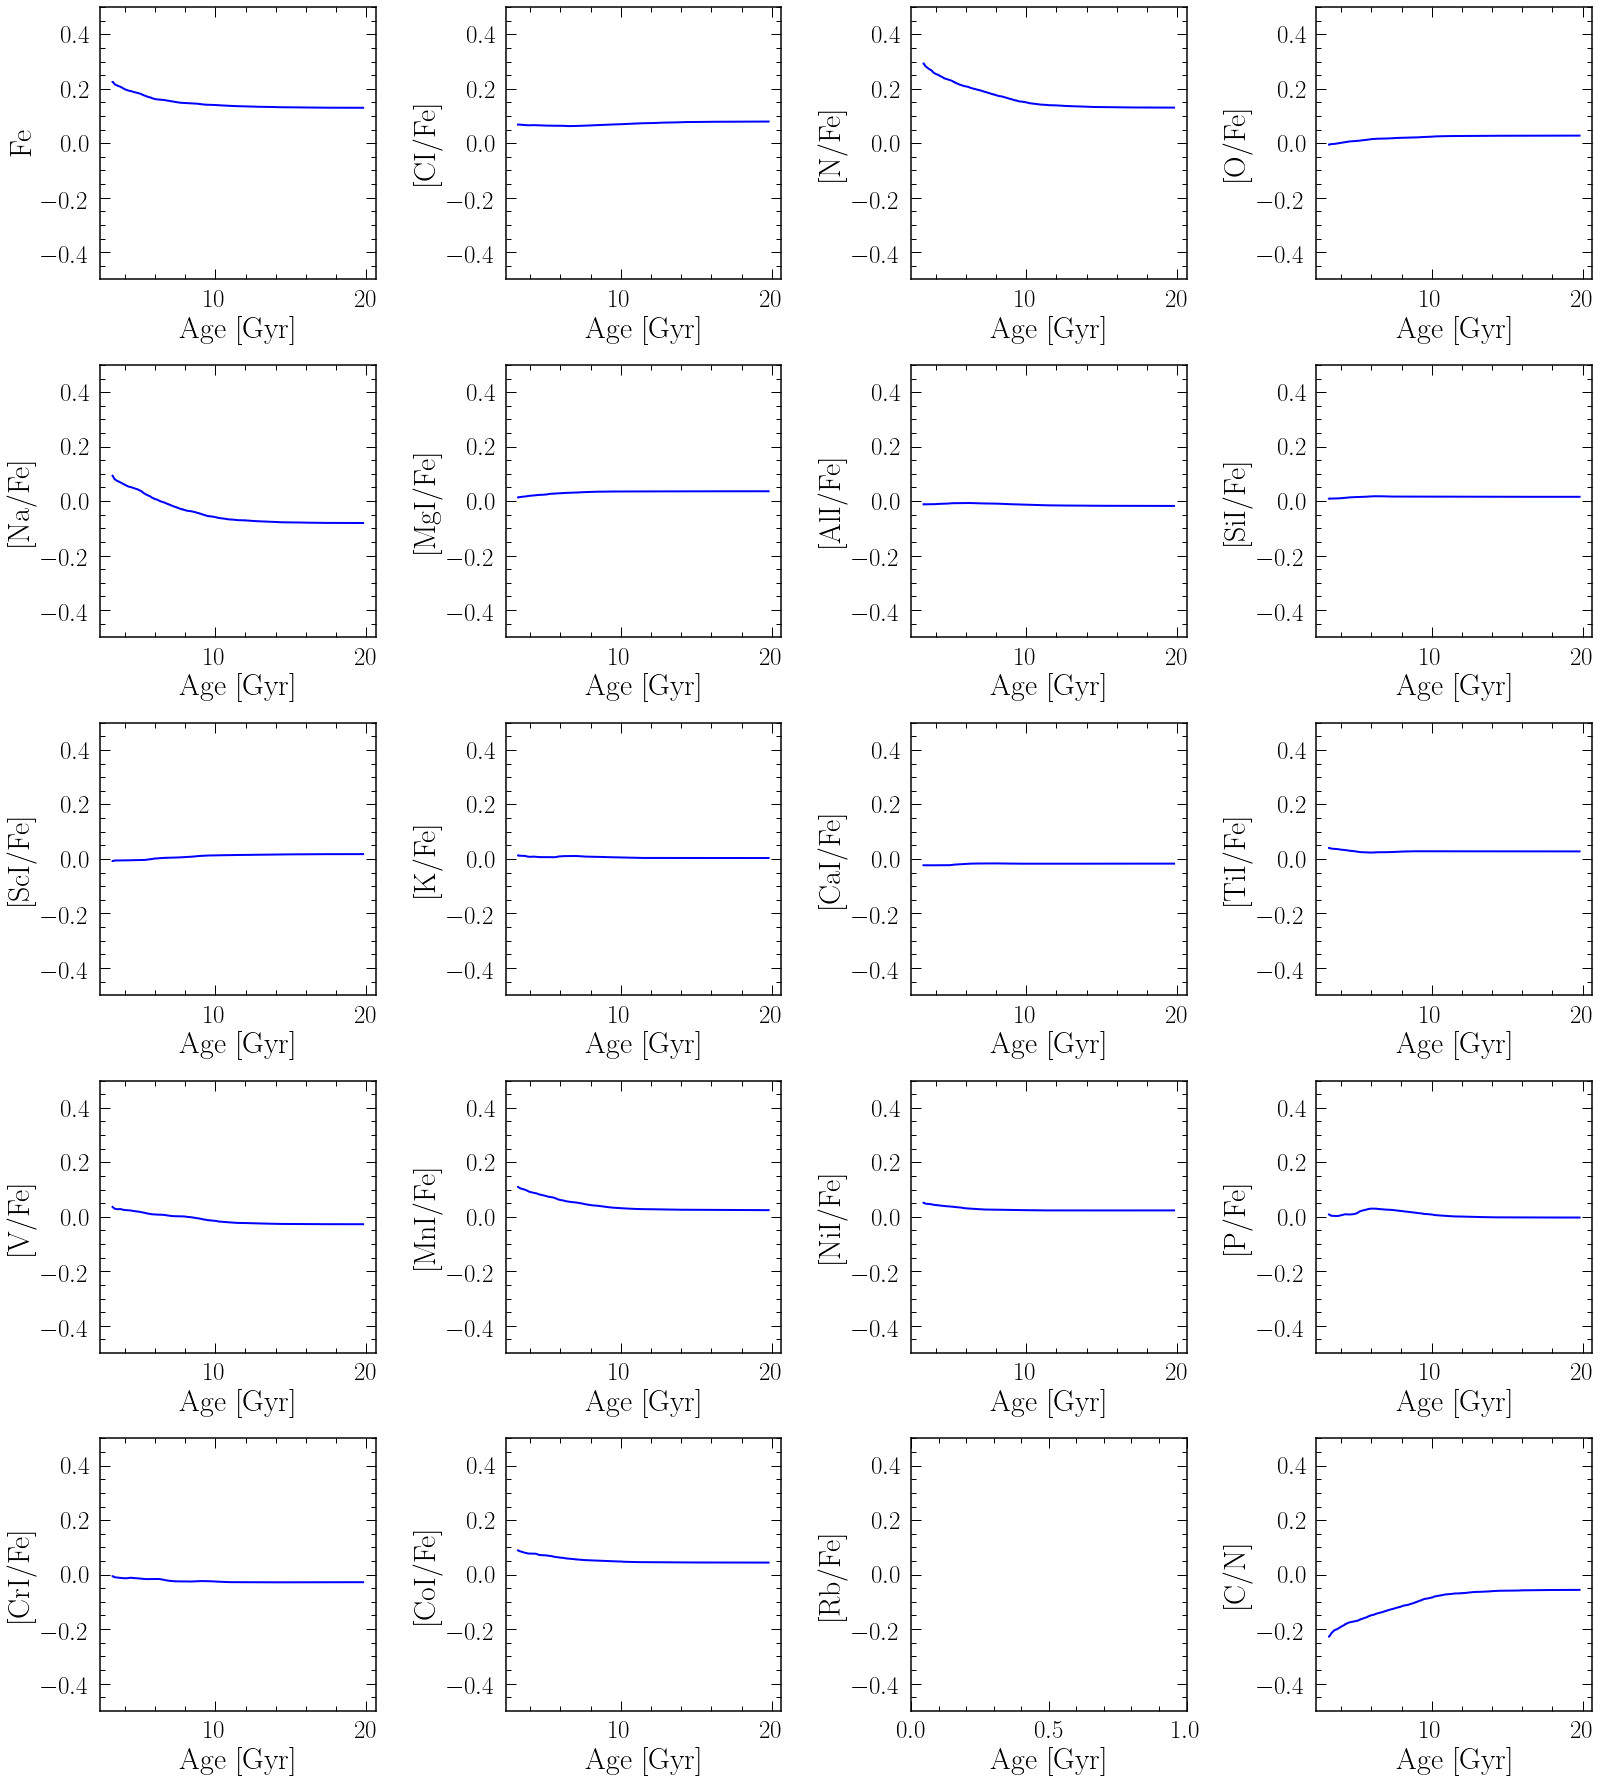

In [362]:
## running median
sigmas=30
rn=500
lim=[-0.5,0.5]
from scipy.ndimage import gaussian_filter


plt.figure(figsize=(22.5,25))
for i in range(1,len(abun_apog)):
    df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    larm=gaussian_filter(df_plot_la[abun_apog[i]].rolling(rn).median(), sigma=sigmas)
    harm=gaussian_filter(df_plot_ha[abun_apog[i]].rolling(rn).median(), sigma=sigmas)
    
    plt.subplot(5,4,i+1)
    #plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]],fmt='b.',alpha=0.01,label='low-$\\alpha$')
    #plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]],fmt='r.',alpha=0.01,label='high-$\\alpha$')
    
    if len(df_plot_la['Age'])!=0:    
        laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
        haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
        
        plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
        plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
    
    plt.ylabel(abund[abun_apog[i]]+'Fe]')
    plt.xlabel('Age [Gyr]')
    plt.ylim(lim)
    #plt.legend()
    
    
# For Fe
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['M_H']>-100]
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['M_H']>-100]
df_plot_la=df_plot_la.reset_index(drop=True)
    
df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
larm=gaussian_filter(df_plot_la['M_H'].rolling(rn).median(),sigma=sigmas)
harm=gaussian_filter(df_plot_ha['M_H'].rolling(rn).median(),sigma=sigmas)
    
plt.subplot(5,4,1)
#plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],fmt='b.',alpha=0.01,label='low-$\\alpha$')
#plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],fmt='r.',alpha=0.01,label='high-$\\alpha$')

laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('Fe')
plt.xlabel('Age [Gyr]')
plt.ylim(lim)
#plt.legend()
 
# for C/N
df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha['C_FE']>-100]
df_plot_ha=df_plot_ha.loc[df_plot_ha['N_FE']>-100]
df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
df_plot_ha=df_plot_ha.reset_index(drop=True)
    
df_plot_la=df_abun_st_la.loc[df_abun_st_la['C_FE']>-100]
df_plot_la=df_plot_la.loc[df_plot_la['N_FE']>-100]
df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
df_plot_la=df_plot_la.reset_index(drop=True)

df_plot_la=df_plot_la.sort_values(by=['Age'])
df_plot_ha=df_plot_ha.sort_values(by=['Age'])    
    
larm=gaussian_filter(df_plot_la['C_N'].rolling(rn).median(),sigma=sigmas)
harm=gaussian_filter(df_plot_ha['C_N'].rolling(rn).median(),sigma=sigmas)
    
plt.subplot(5,4,20)
#plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],fmt='b.',alpha=0.01,label='low-$\\alpha$')
#plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],fmt='r.',alpha=0.01,label='high-$\\alpha$')
    
laage,larm=zip(*sorted(zip(df_plot_la['Age'][(rn-1):],larm[(rn-1):])))
haage,harm=zip(*sorted(zip(df_plot_ha['Age'][(rn-1):],harm[(rn-1):])))
    
plt.plot(laage,larm,'b-',alpha=1,linewidth=2,label='low-$\\alpha$')
plt.plot(haage,harm,'r-',alpha=1,linewidth=2,label='high-$\\alpha$')
    
plt.ylabel('[C/N]')
plt.xlabel('Age [Gyr]')
plt.ylim(lim)
#plt.legend()

plt.tight_layout()

plt.savefig('abund_cannon.png')